In [1]:
import andes
import os

import matplotlib
%matplotlib inline

In [2]:
# !andes run <url> -C

# !andes run case123_DG2.m --convert xlsx

! is magic command, which means running terminal command in ipynb

# Load case

In [3]:
andes.config_logger(stream_level=20)

# case path
dir_path = os.path.abspath('..')
loc_path_case1 = '/Case_123bus/case123_tds.xlsx'
loc_path_case2 = '/Case_123bus/case123_REGCV1.xlsx'
loc_path_case3 = '/Case_123bus/case123_REGCV1_v2.xlsx'

case = dir_path + loc_path_case3

# load a case
ssa = andes.load(case,
                 setup=True,
                 no_output=True)

Working directory: "/home/buxin/andes/bshe/Case_123bus"
> Loaded config from file "/home/buxin/.andes/andes.rc"
> Loaded generated Python code in "/home/buxin/.andes/pycode".
Parsing input file "/home/buxin/andes/bshe/Case_123bus/case123_REGCV1_v2.xlsx"...
Input file parsed in 0.4719 seconds.
System internal structure set up in 0.0241 seconds.


# Check power flow

In [4]:
ssa.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0026 seconds.
0: |F(x)| = 0.8
1: |F(x)| = 0.0005057156925
2: |F(x)| = 2.592582622e-07
Converged in 3 iterations in 0.0059 seconds.


True

In [5]:
# StaticGen bus voltage
ssa.PV.v.v

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# StaticGen active power
ssa.PV.p.v

array([0.08 , 0.08 , 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015,
       0.015])

In [7]:
# StaticGen reactive power
ssa.PV.q.v

array([-0.04902717,  0.01117913,  0.01214384,  0.04443501,  0.04687861,
        0.03520508,  0.0153171 ,  0.03339045,  0.01692973,  0.01811494])

In [8]:
# Slack bus voltage
ssa.Slack.v.v

array([1.])

In [9]:
# Slack bus active power
ssa.Slack.p.v

array([0.07590528])

In [10]:
# Slack bus reactive power
ssa.Slack.q.v

array([0.00451273])

# Transient simulation

In [11]:
ssa.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 0.902  | 1    


Initialization for dynamics completed in 0.0354 seconds.
Initialization was successful.


array([ 2.24335316e-01,  1.84212631e-01,  1.90851166e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  9.63832424e-01,  9.95418404e-01,
        9.92731361e-01,  1.62798229e-01,  1.63483983e-01,  1.57950697e-01,
        9.78913625e-01,  9.82196239e-01,  9.83391868e-01,  2.08477341e-01,
        1.96424786e-01,  1.89776583e-01,  8.01760733e-02,  8.01304995e-02,
        7.60209171e-02,  8.01760733e-02,  8.01304995e-02,  7.60209171e-02,
        9.01797382e-01,  1.05193250e+00,  1.03265016e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.32497629e-02, -4.82116242e-03,
       -2.04485180e-03,  1.33822605e-01, -4.86937404e-02, -2.06530032e-02,
        9.01797382e-01,  1.05193250e+00,  1.03265016e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.01760733e-02,  8.01304995e-02,
        7.60209171e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.01760733e-02,  8.01304995e-02,  7.60209171e-02,  8.01760733e-02,
        8.01304995e-02,  

In [12]:
# check TGOV1N lower limiter
ssa.TGOV1N.LAG_lim.zl

array([0., 0., 0.])

In [13]:
# check TGOV1N upper limiter
ssa.TGOV1N.LAG_lim.zu

array([0., 0., 0.])

In [14]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=5.0 sec.


Simulation to t=20.00 sec completed in 1.1608 seconds.


True

## plot

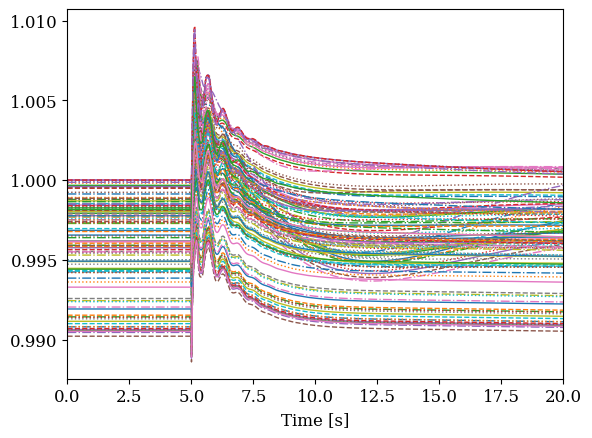

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [15]:
ssa.TDS.plt.plot(
                ssa.Bus.v
                )

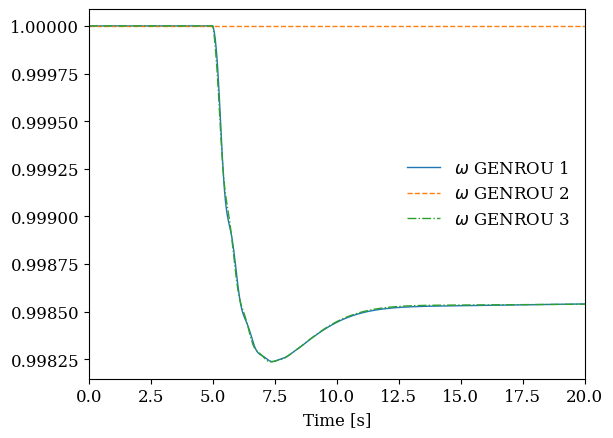

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [16]:
ssa.TDS.plt.plot(ssa.GENROU.omega)

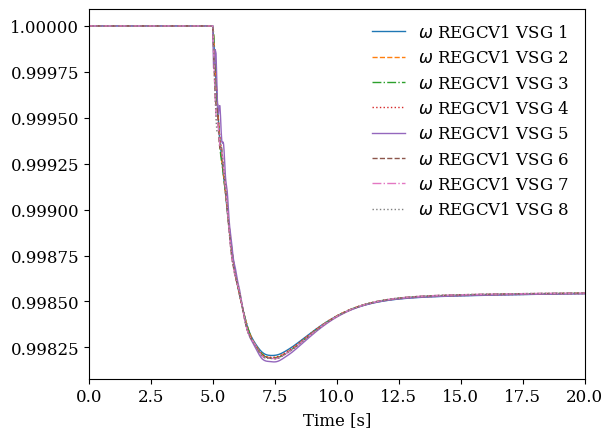

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [17]:
ssa.TDS.plt.plot(
                ssa.REGCV1.omega
                )

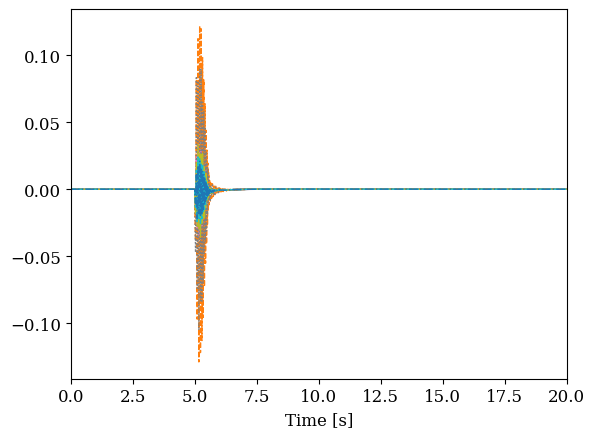

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [18]:
ssa.TDS.plt.plot(
                ssa.BusROCOF.Wf_y
                )